In [25]:
from copulas.datasets import sample_univariate_beta
data = sample_univariate_beta()

In [26]:
data.head()

0    4.796025
1    4.935189
2    4.637677
3    4.945320
4    4.726815
dtype: float64

<AxesSubplot:>

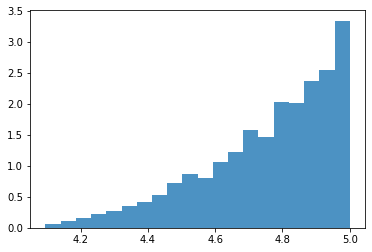

In [27]:
%matplotlib inline
from copulas.visualization import hist_1d
hist_1d(data)

In [28]:
from copulas.univariate import BetaUnivariate

beta = BetaUnivariate()
beta.fit(data)

In [29]:
beta._params

{'loc': 4.095558923695414,
 'scale': 0.9044258869808379,
 'a': 2.552323190906778,
 'b': 0.9041091899047313}

In [30]:
sampled = beta.sample(1000)

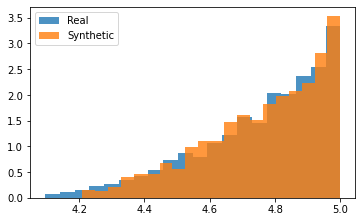

In [31]:
from copulas.visualization import compare_1d
compare_1d(data, sampled)

In [32]:
probability_density = beta.pdf(sampled)
probability_density[0:5]

array([3.065901  , 0.67709243, 0.80183108, 1.41720995, 0.96518225])

<AxesSubplot:xlabel='data'>

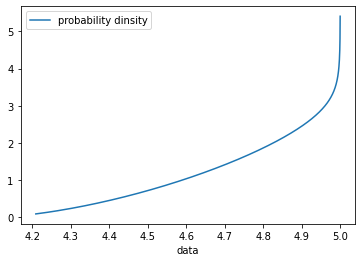

In [33]:
import pandas as pd
pd.DataFrame({'data':sampled, 'probability dinsity':probability_density}).sort_values('data').set_index('data').plot()

In [34]:
cumulative_distribution = beta.cumulative_distribution(sampled)

In [35]:
cumulative_distribution[0:5]

array([0.87860281, 0.1012492 , 0.13257834, 0.32267578, 0.17778866])

<AxesSubplot:xlabel='data'>

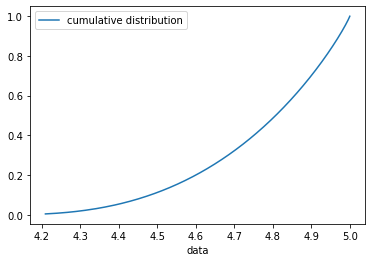

In [36]:
pd.DataFrame({
    'data':sampled,
    'cumulative distribution':cumulative_distribution
}).sort_values('data').set_index('data').plot()

In [37]:
parameters = beta.to_dict()

In [38]:
parameters

{'loc': 4.095558923695414,
 'scale': 0.9044258869808379,
 'a': 2.552323190906778,
 'b': 0.9041091899047313,
 'type': 'copulas.univariate.beta.BetaUnivariate'}

In [39]:
from copulas.univariate import Univariate

new_beta = Univariate.from_dict(parameters)

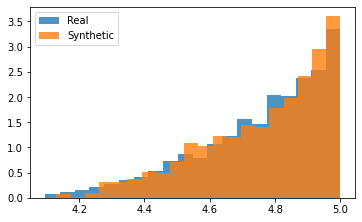

In [40]:
new_sampled = new_beta.sample(1000)

compare_1d(data, new_sampled)

In [41]:
from copulas.univariate import Univariate

univariate = Univariate()
univariate.fit(data)

In [42]:
parameters = univariate.to_dict()
parameters

{'loc': 4.095558923695414,
 'scale': 0.9044258869808379,
 'a': 2.552323190906778,
 'b': 0.9041091899047313,
 'type': 'copulas.univariate.beta.BetaUnivariate'}

In [43]:
from copulas.datasets import sample_univariates
data = sample_univariates()
data.head()

,bernoulli,bimodal,uniform,normal,degenerate,exponential,beta
0,0.0,11.399355,0.498160,1.496714,0.37454,3.469268,4.796025
1,0.0,10.924634,2.802857,0.861736,0.37454,6.010121,4.935189
2,0.0,10.059630,1.927976,1.647689,0.37454,4.316746,4.637677
3,0.0,9.353063,1.394634,2.523030,0.37454,3.912943,4.945320
4,1.0,-0.234153,-0.375925,0.765847,0.37454,3.169625,4.726815


In [45]:
synth_data = pd.DataFrame()
distributions = []

for column in data.columns:
    real_data = data[column]
    univariate = Univariate()
    univariate.fit(real_data)
    synth_data[column] = univariate.sample(len(real_data))
    distributions.append(univariate.to_dict()['type'])

In [46]:
synth_data.head()

,bernoulli,bimodal,uniform,normal,degenerate,exponential,beta
0,-0.172065,9.678137,1.612077,0.185764,0.37454,3.074490,4.882875
1,-0.096897,2.193164,0.705761,1.567572,0.37454,4.789087,4.718357
2,0.177676,-5.192497,-0.801649,1.511877,0.37454,3.007562,4.732652
3,0.150036,0.369133,-0.475530,0.156692,0.37454,3.130895,4.744160
4,1.095284,11.242391,2.673074,2.588458,0.37454,5.315645,4.272971


In [47]:
distributions

['copulas.univariate.gaussian_kde.GaussianKDE',
 'copulas.univariate.gaussian_kde.GaussianKDE',
 'copulas.univariate.beta.BetaUnivariate',
 'copulas.univariate.gaussian_kde.GaussianKDE',
 'copulas.univariate.beta.BetaUnivariate',
 'copulas.univariate.gamma.GammaUnivariate',
 'copulas.univariate.beta.BetaUnivariate']

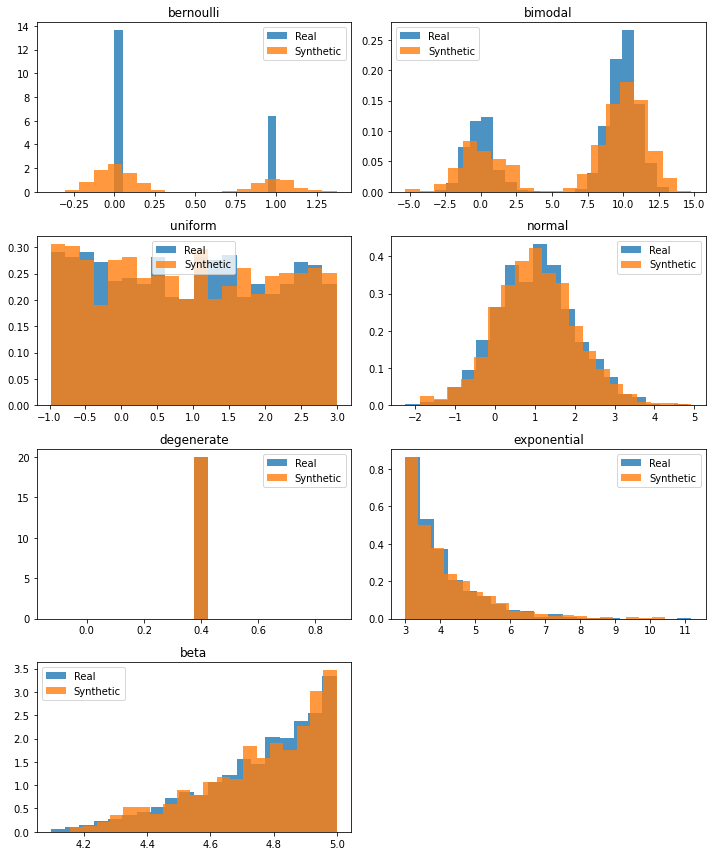

In [48]:
compare_1d(data,synth_data)